# 2 Data Understanding

## 2.1 Descriptive statistics

## Runner statistics

In [111]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


import pandas as pd
import numpy as np
import os

from IPython.display import display
from nyrr import data_util
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

NYRR_DATA_PATH = os.path.join(os.getcwd(), "dataset")

### 2.1.2 Data conversion + columns reduction

* Convert time string to seconds
* Reduce unused columns

In [2]:
racer_df = pd.read_csv( NYRR_DATA_PATH + '/race_racers.csv')

racer_df['overallTime_seconds'] = racer_df['overallTime'].apply(data_util.time_to_second)
racer_df['pace_seconds'] = racer_df['pace'].apply(data_util.time_to_second)

display(racer_df.info())
display(racer_df.head())

# reduced_df = racer_df[['runnerId', 'age', 'gender','city','overallTime', 'pace', 'racesCount']]
# reduced_df.set_index('runnerId', inplace=True)
# display(reduced_df)
# display(reduced_df.describe())
# reduced_df.to_csv(NYRR_DATA_PATH + '/race_racers_2.12.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15606 entries, 0 to 15605
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   runnerId             15606 non-null  int64  
 1   firstName            15606 non-null  object 
 2   lastName             15606 non-null  object 
 3   bib                  15606 non-null  int64  
 4   age                  15606 non-null  int64  
 5   birthdate            15606 non-null  object 
 6   gender               15606 non-null  object 
 7   city                 15606 non-null  object 
 8   countryCode          15606 non-null  object 
 9   stateProvince        15606 non-null  object 
 10  iaaf                 15606 non-null  object 
 11  overallPlace         15606 non-null  int64  
 12  overallTime          15606 non-null  object 
 13  pace                 15606 non-null  object 
 14  genderPlace          15606 non-null  int64  
 15  ageGradeTime         15606 non-null 

None

,runnerId,firstName,lastName,bib,age,birthdate,gender,city,countryCode,stateProvince,...,overallPlace,overallTime,pace,genderPlace,ageGradeTime,ageGradePlace,ageGradePercent,racesCount,overallTime_seconds,pace_seconds
0,26782596,Jeff,Headley,32889,37,1981-11-12T00:00:00,M,Sewaren,USA,NJ,...,48885,6:00:14,13:45,28948,55:33,29762,34.58,57,21614,825
1,26769978,Brian,Borden,26764,56,1963-10-17T00:00:00,M,Neptune,USA,NJ,...,41698,5:16:36,12:05,25707,27:43,21822,45.93,85,18996,725
2,26769983,Edward,Hasse,10663,56,1963-09-26T00:00:00,M,Montvale,USA,NJ,...,40737,5:12:19,11:55,25247,24:06,21120,46.56,43,18739,715
3,26769987,Richard,Steffens,65799,52,1967-06-18T00:00:00,M,Secaucus,USA,NJ,...,52867,7:20:35,16:49,30562,26:16,30354,31.83,10,26435,1009
4,26770040,Nina,Nobile,10804,61,1958-01-20T00:00:00,F,Plainsboro,USA,NJ,...,50919,6:27:11,14:47,21156,56:23,15688,45.69,28,23231,887


In [3]:
display(racer_df['stateProvince'].value_counts())

# Unify state name for NY
racer_df.loc[(racer_df.stateProvince.isin(['NY- NEW YORK', 'NY - New York', 'New York (NY)'])), 'stateProvince'] = 'NY'

display(racer_df['stateProvince'].value_counts())


NY               12797
NJ                2803
NY - New York        3
New York (NY)        2
NY- NEW YORK         1
Name: stateProvince, dtype: int64

NY    12803
NJ     2803
Name: stateProvince, dtype: int64

## Comparing runners from NY to NJ

### Population and Gender

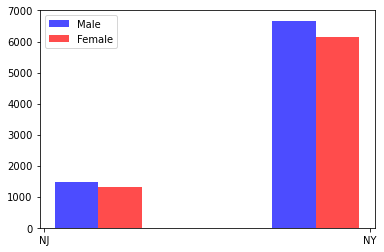

In [4]:
# See: https://stackoverflow.com/a/43442184/373707
        
import matplotlib.pyplot as plt
import random

gender = racer_df['gender']
state = racer_df['stateProvince']

plt.hist([[a for a, s in zip(state, gender) if s=='M'], 
          [a for a, s in zip(state, gender) if s=='F']], 
         color=['b','r'], alpha=0.7, bins=3, label=['Male', 'Female'])
plt.legend(loc='upper left')

plt.show()



In [5]:
num_male = racer_df.loc[(racer_df['age'] >=30) & (racer_df['age'] <=39) & (racer_df['gender'] == 'M')].shape[0]
num_female = racer_df.loc[(racer_df['age'] >=30) & (racer_df['age'] <=39) & (racer_df['gender'] == 'F')].shape[0]

print()
print(num_male, num_female)



2804 2638


## Gender and age

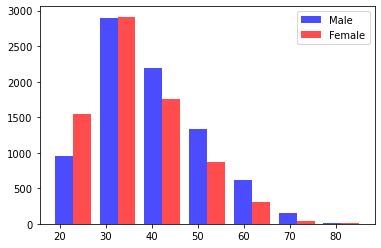

In [6]:
age = racer_df['age']

plt.hist([[a for a, s in zip(age, gender) if s=='M'], 
          [a for a, s in zip(age, gender) if s=='F']], 
         color=['b','r'], alpha=0.7, bins=7, label=['Male', 'Female'])
plt.legend(loc='upper right')

plt.show()

### Which city has the fastest runners on average?

### Finding
* The result show that the aveage pace for these cities is unrealistic. Because depends on how many runners is participate in the race. For example, Ledgewood being the average pace of less than 5 minutes. And College point being about 7 minutes pace because there's only one runner for that city.

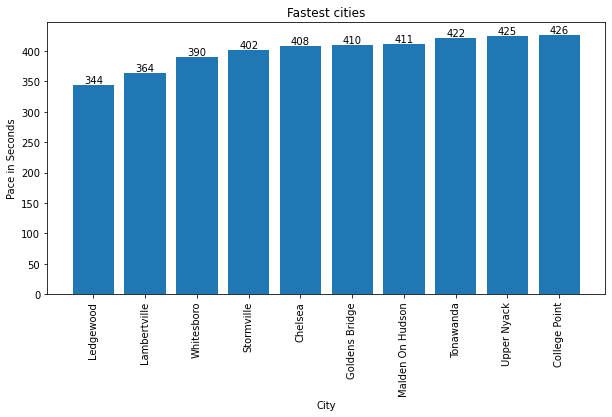

In [105]:
group_by_city = racer_df[['city', 'pace_seconds']].groupby('city').mean().sort_values(by=['pace_seconds'])
top_cities = group_by_city.head(10)

x = top_cities.reset_index()[['city', 'pace_seconds']]

fig, ax = plt.subplots()
p1 = ax.bar(x['city'], x['pace_seconds'])
ax.set_ylabel("Pace in Seconds")
ax.set_xlabel("City")
ax.set_title("Fastest cities")

ax.bar_label(p1, label_type='edge')
ax.xaxis.set_ticks(x['city'])
ax.set_xticklabels(labels=x['city'],rotation=90)

fig.set_size_inches(10, 5)

# racer_df.loc[racer_df['city'] == 'College Point']

#### What is the correlation between pace and otehr attributes?

array([[<AxesSubplot:xlabel='pace_seconds', ylabel='pace_seconds'>,
        <AxesSubplot:xlabel='age', ylabel='pace_seconds'>,
        <AxesSubplot:xlabel='racesCount', ylabel='pace_seconds'>,
        <AxesSubplot:xlabel='ageGradePercent', ylabel='pace_seconds'>],
       [<AxesSubplot:xlabel='pace_seconds', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='racesCount', ylabel='age'>,
        <AxesSubplot:xlabel='ageGradePercent', ylabel='age'>],
       [<AxesSubplot:xlabel='pace_seconds', ylabel='racesCount'>,
        <AxesSubplot:xlabel='age', ylabel='racesCount'>,
        <AxesSubplot:xlabel='racesCount', ylabel='racesCount'>,
        <AxesSubplot:xlabel='ageGradePercent', ylabel='racesCount'>],
       [<AxesSubplot:xlabel='pace_seconds', ylabel='ageGradePercent'>,
        <AxesSubplot:xlabel='age', ylabel='ageGradePercent'>,
        <AxesSubplot:xlabel='racesCount', ylabel='ageGradePercent'>,
        <AxesSubplot:xlabel='ageGradePercent', 

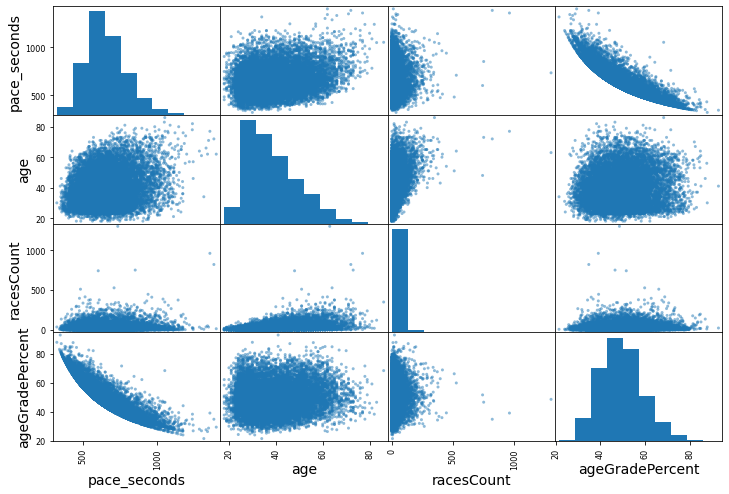

In [118]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from pandas.plotting import scatter_matrix

attributes = ['pace_seconds', 'age', 'racesCount', 'ageGradePercent']
scatter_matrix(racer_df[attributes], figsize=(12,8))

In [117]:
corr_matrix = racer_df.corr()
corr_matrix['pace_seconds'].sort_values(ascending=False)

pace_seconds           1.000000
overallTime_seconds    0.999998
overallPlace           0.950331
genderPlace            0.818638
ageGradePlace          0.747839
bib                    0.680950
age                    0.238492
racesCount             0.073395
runnerId               0.010858
ageGradePercent       -0.879394
Name: pace_seconds, dtype: float64

### Basic statistic

* Total runner: 15606
* From NY,NJ 

The reason to get runners from NY and NJ is because they most likely have participate in some past races organized by NYRR. Thus we could trace back those historical race data to for our analysis.



### Age Distribution

* Good representative for each age group 
* Min: 18; Max: 86; Avg: 38.5


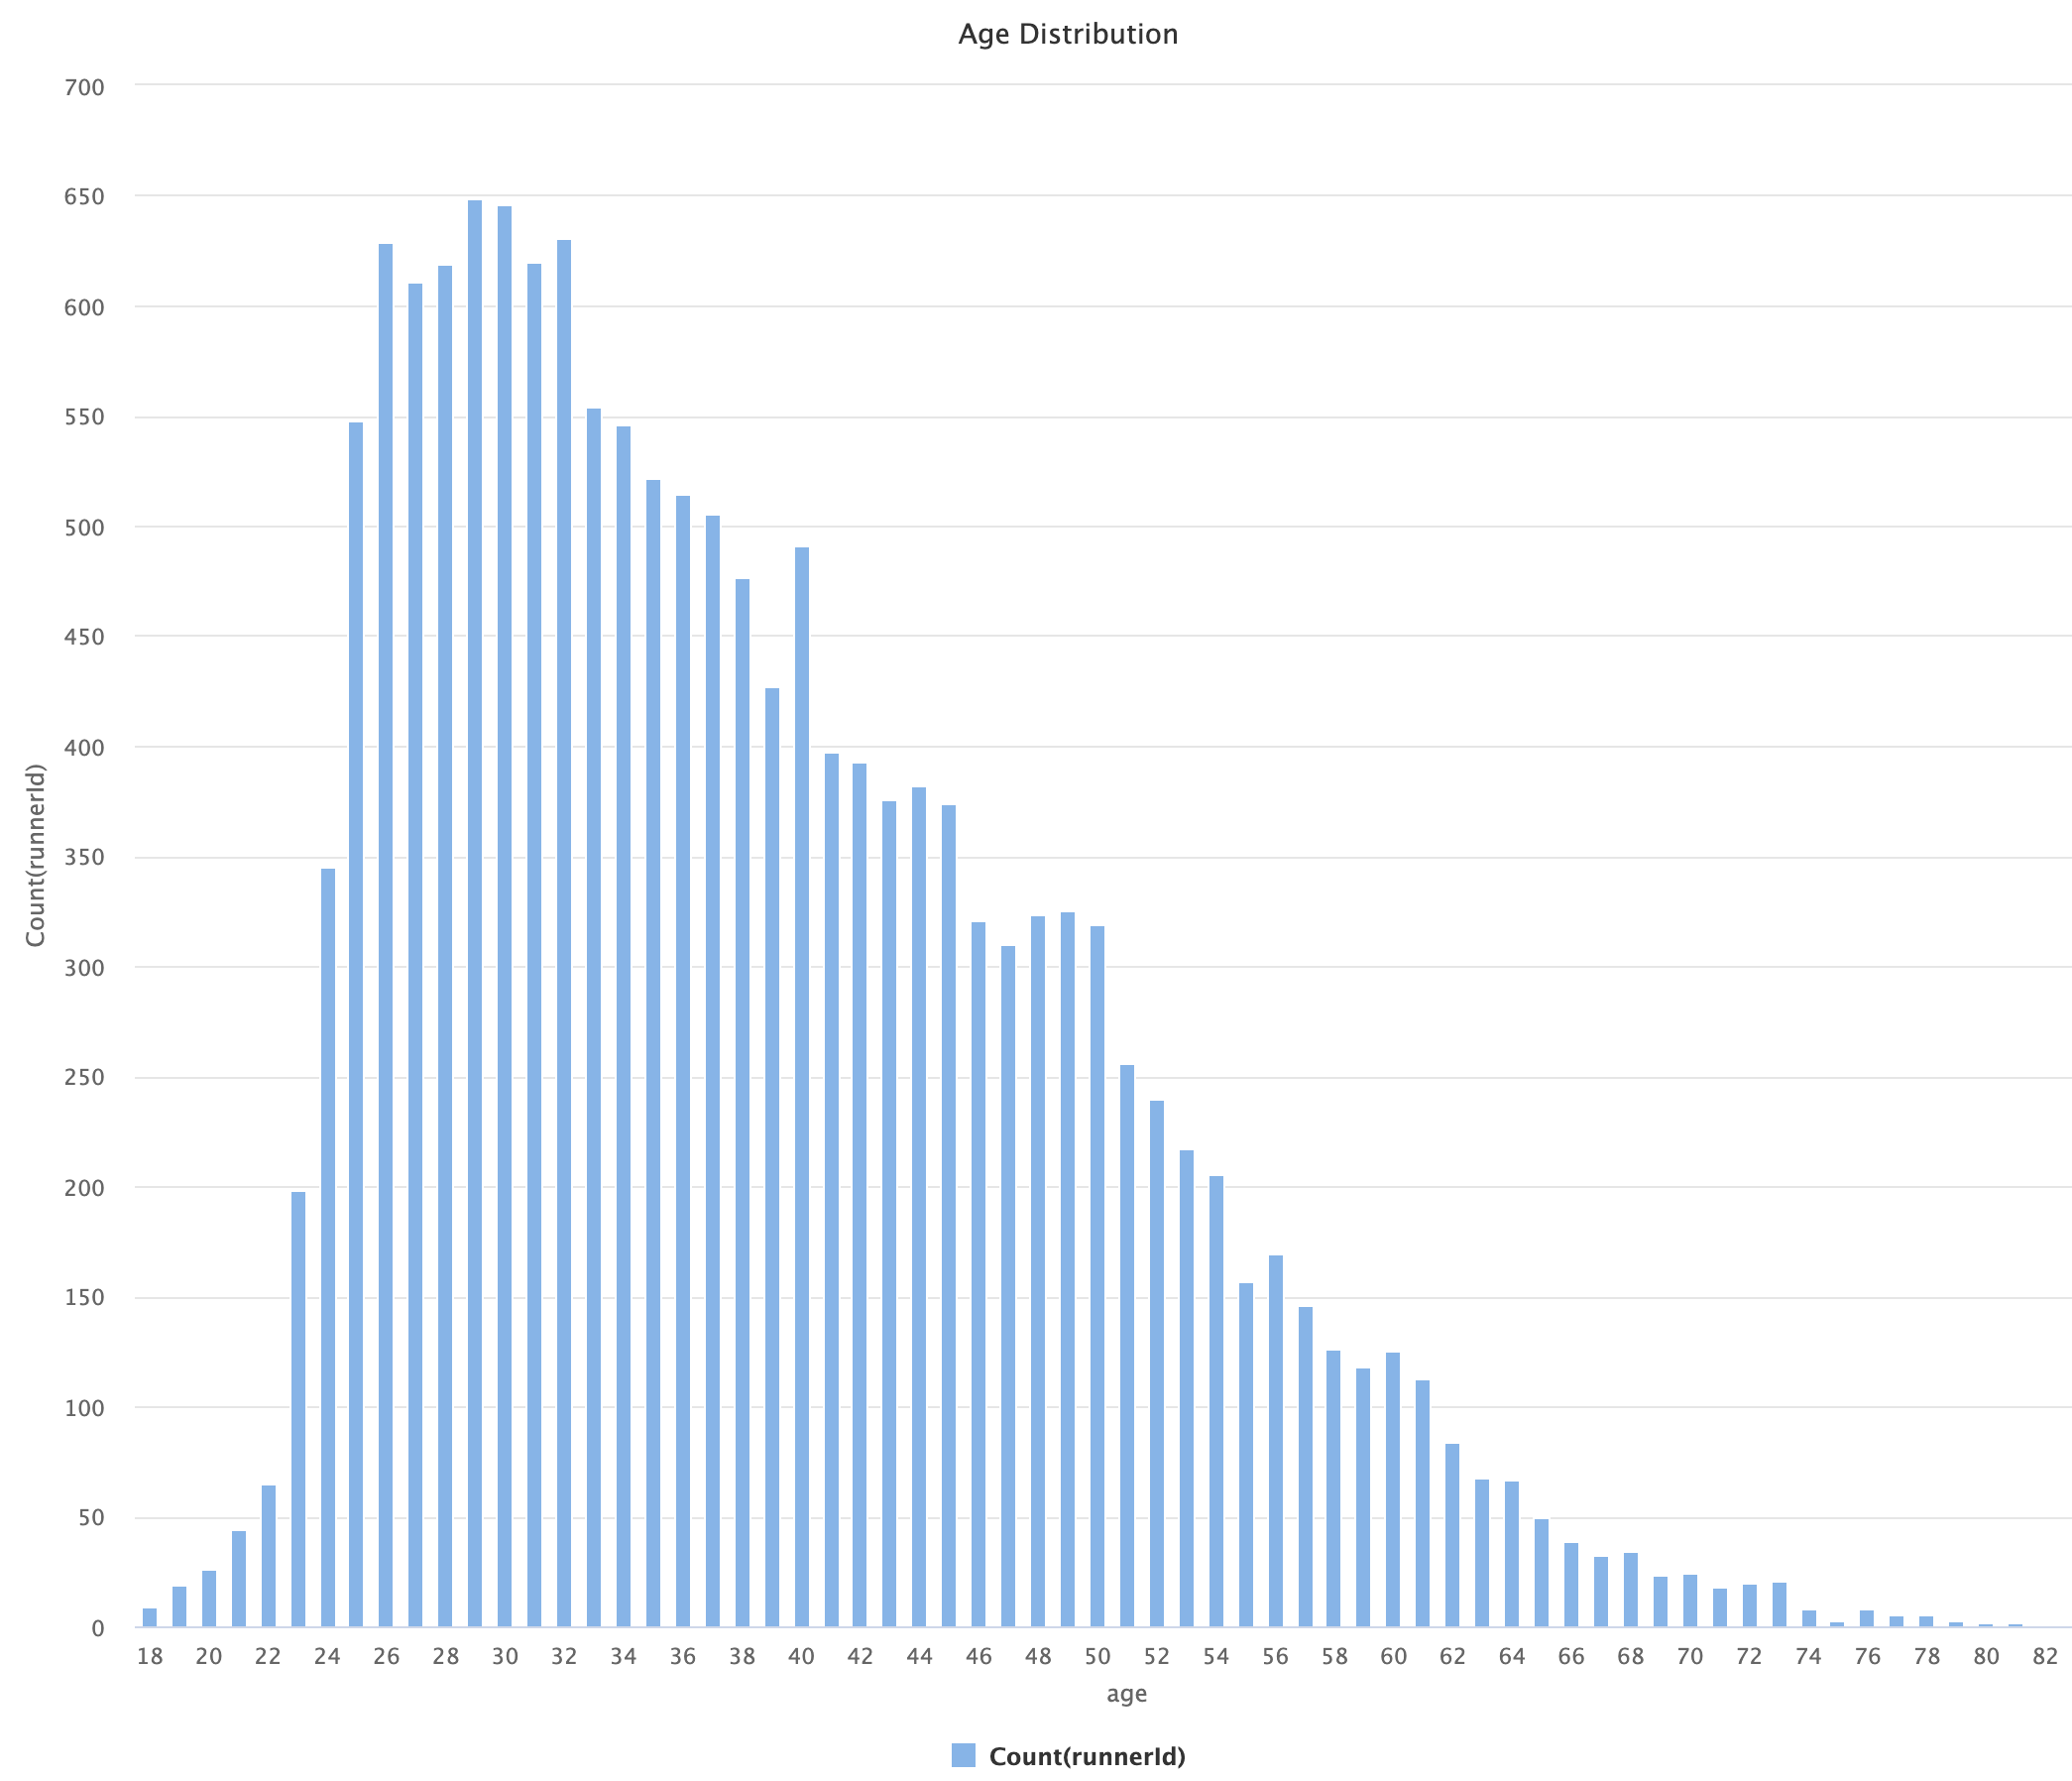


### Gender Distribution

* Male: 8158; Female: 7448

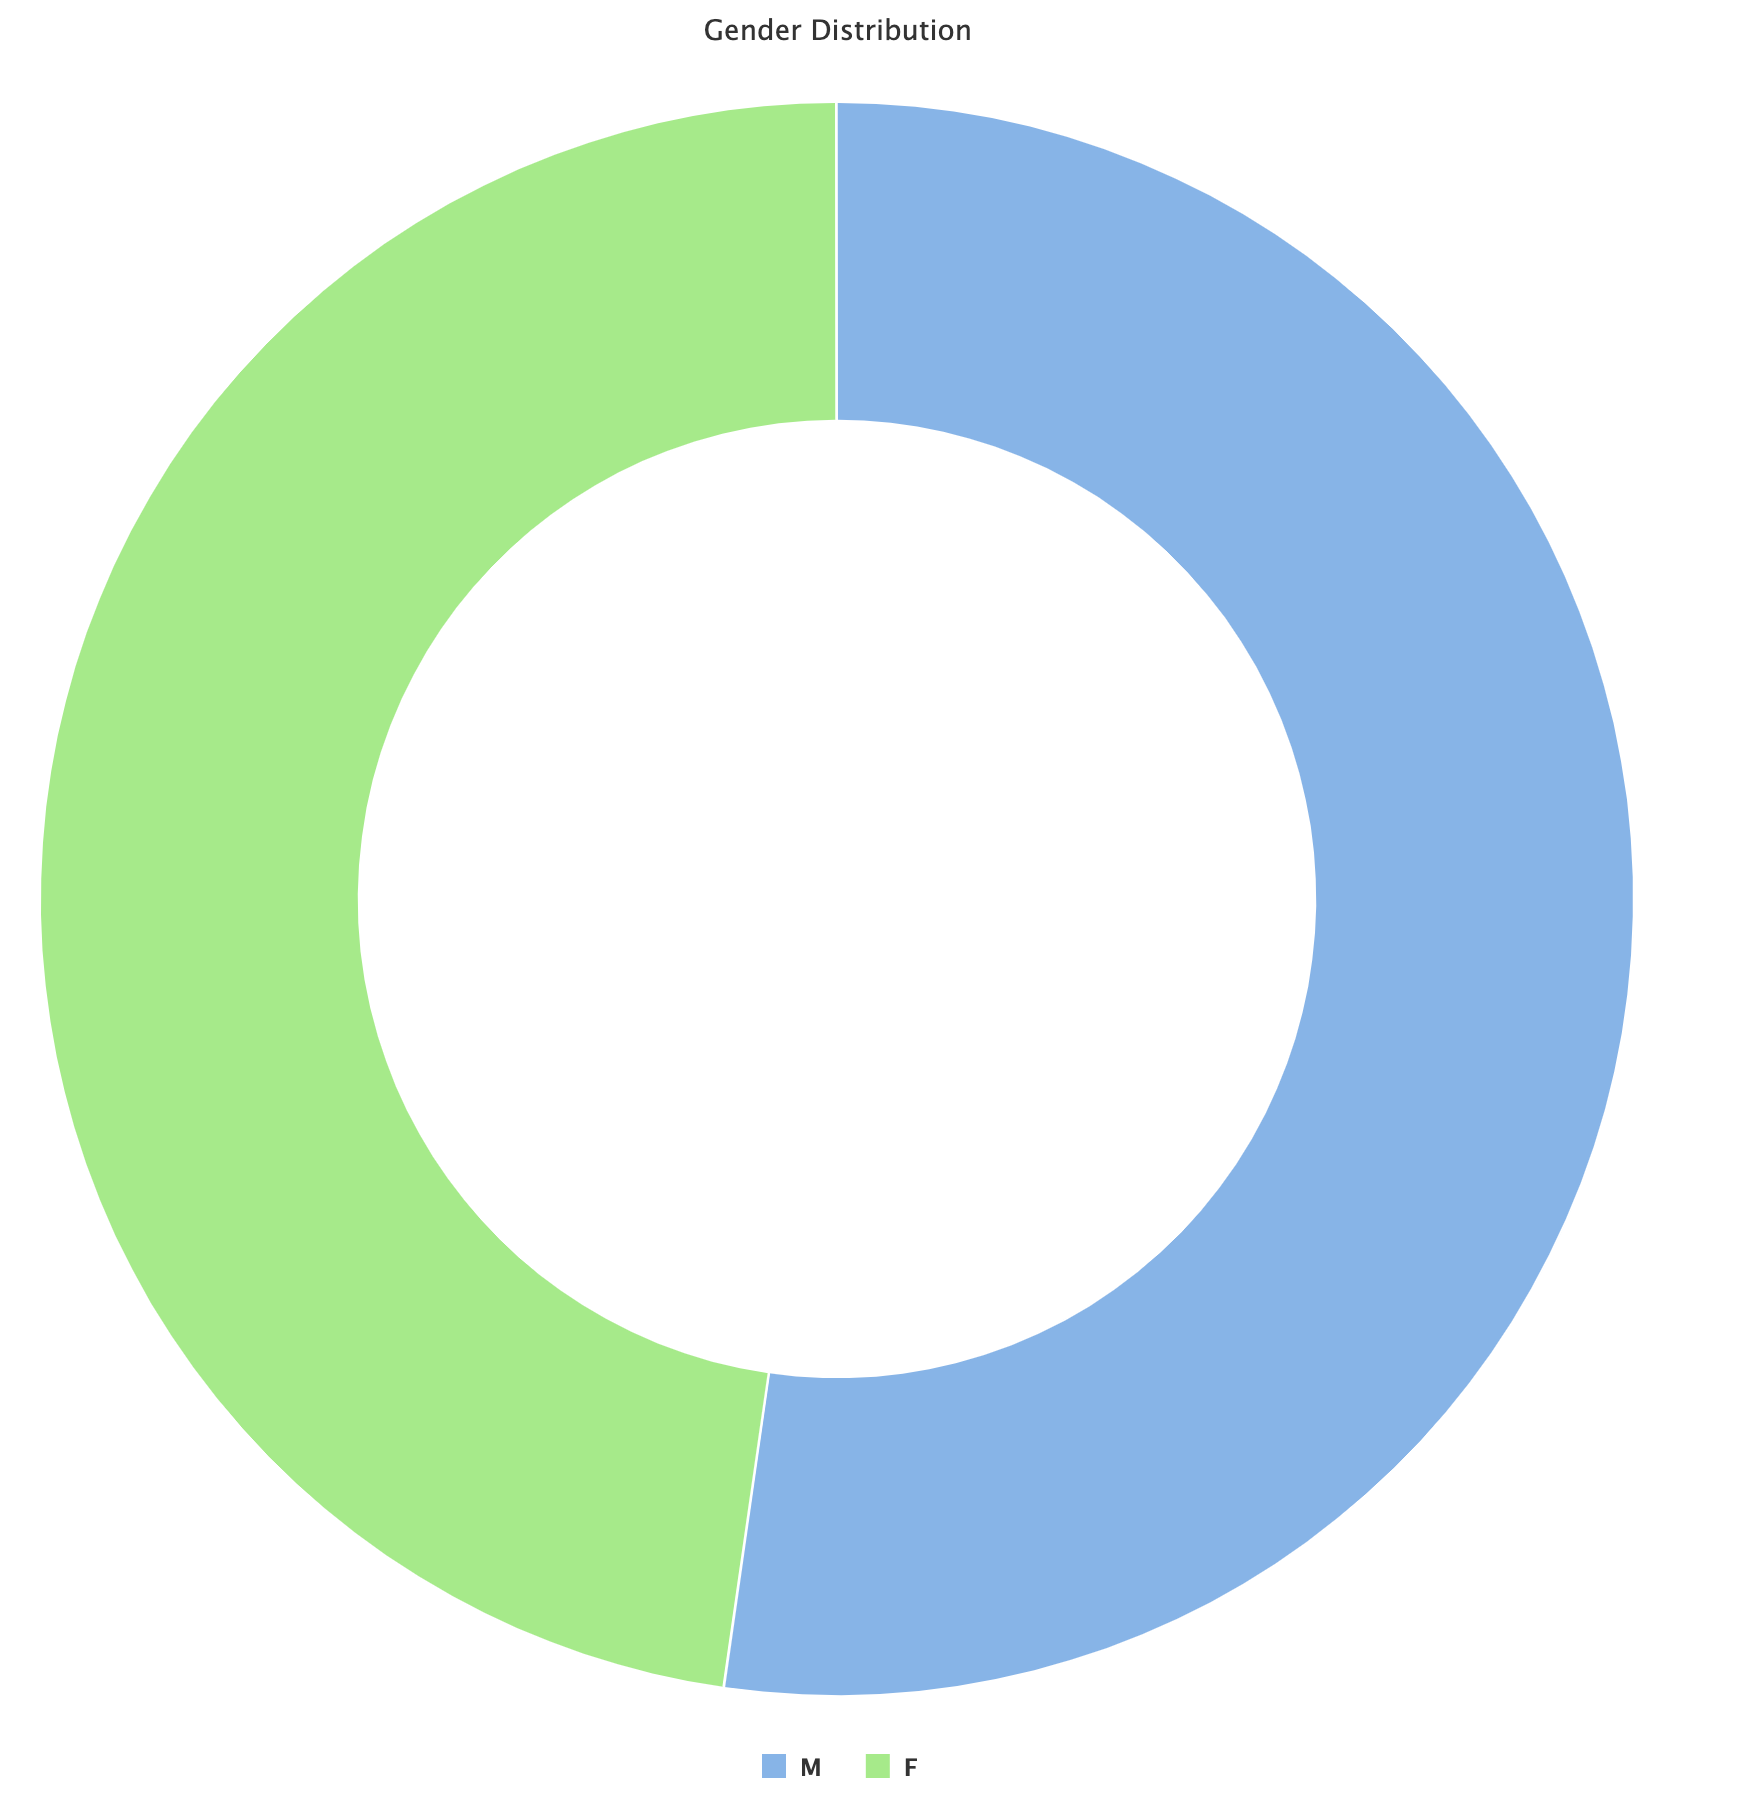

### Pace Distributin

* Majority running between 550 - 750s, about (9.1 min/mil - 12.5 min/mil) - (03:58 - 05:27 hr)

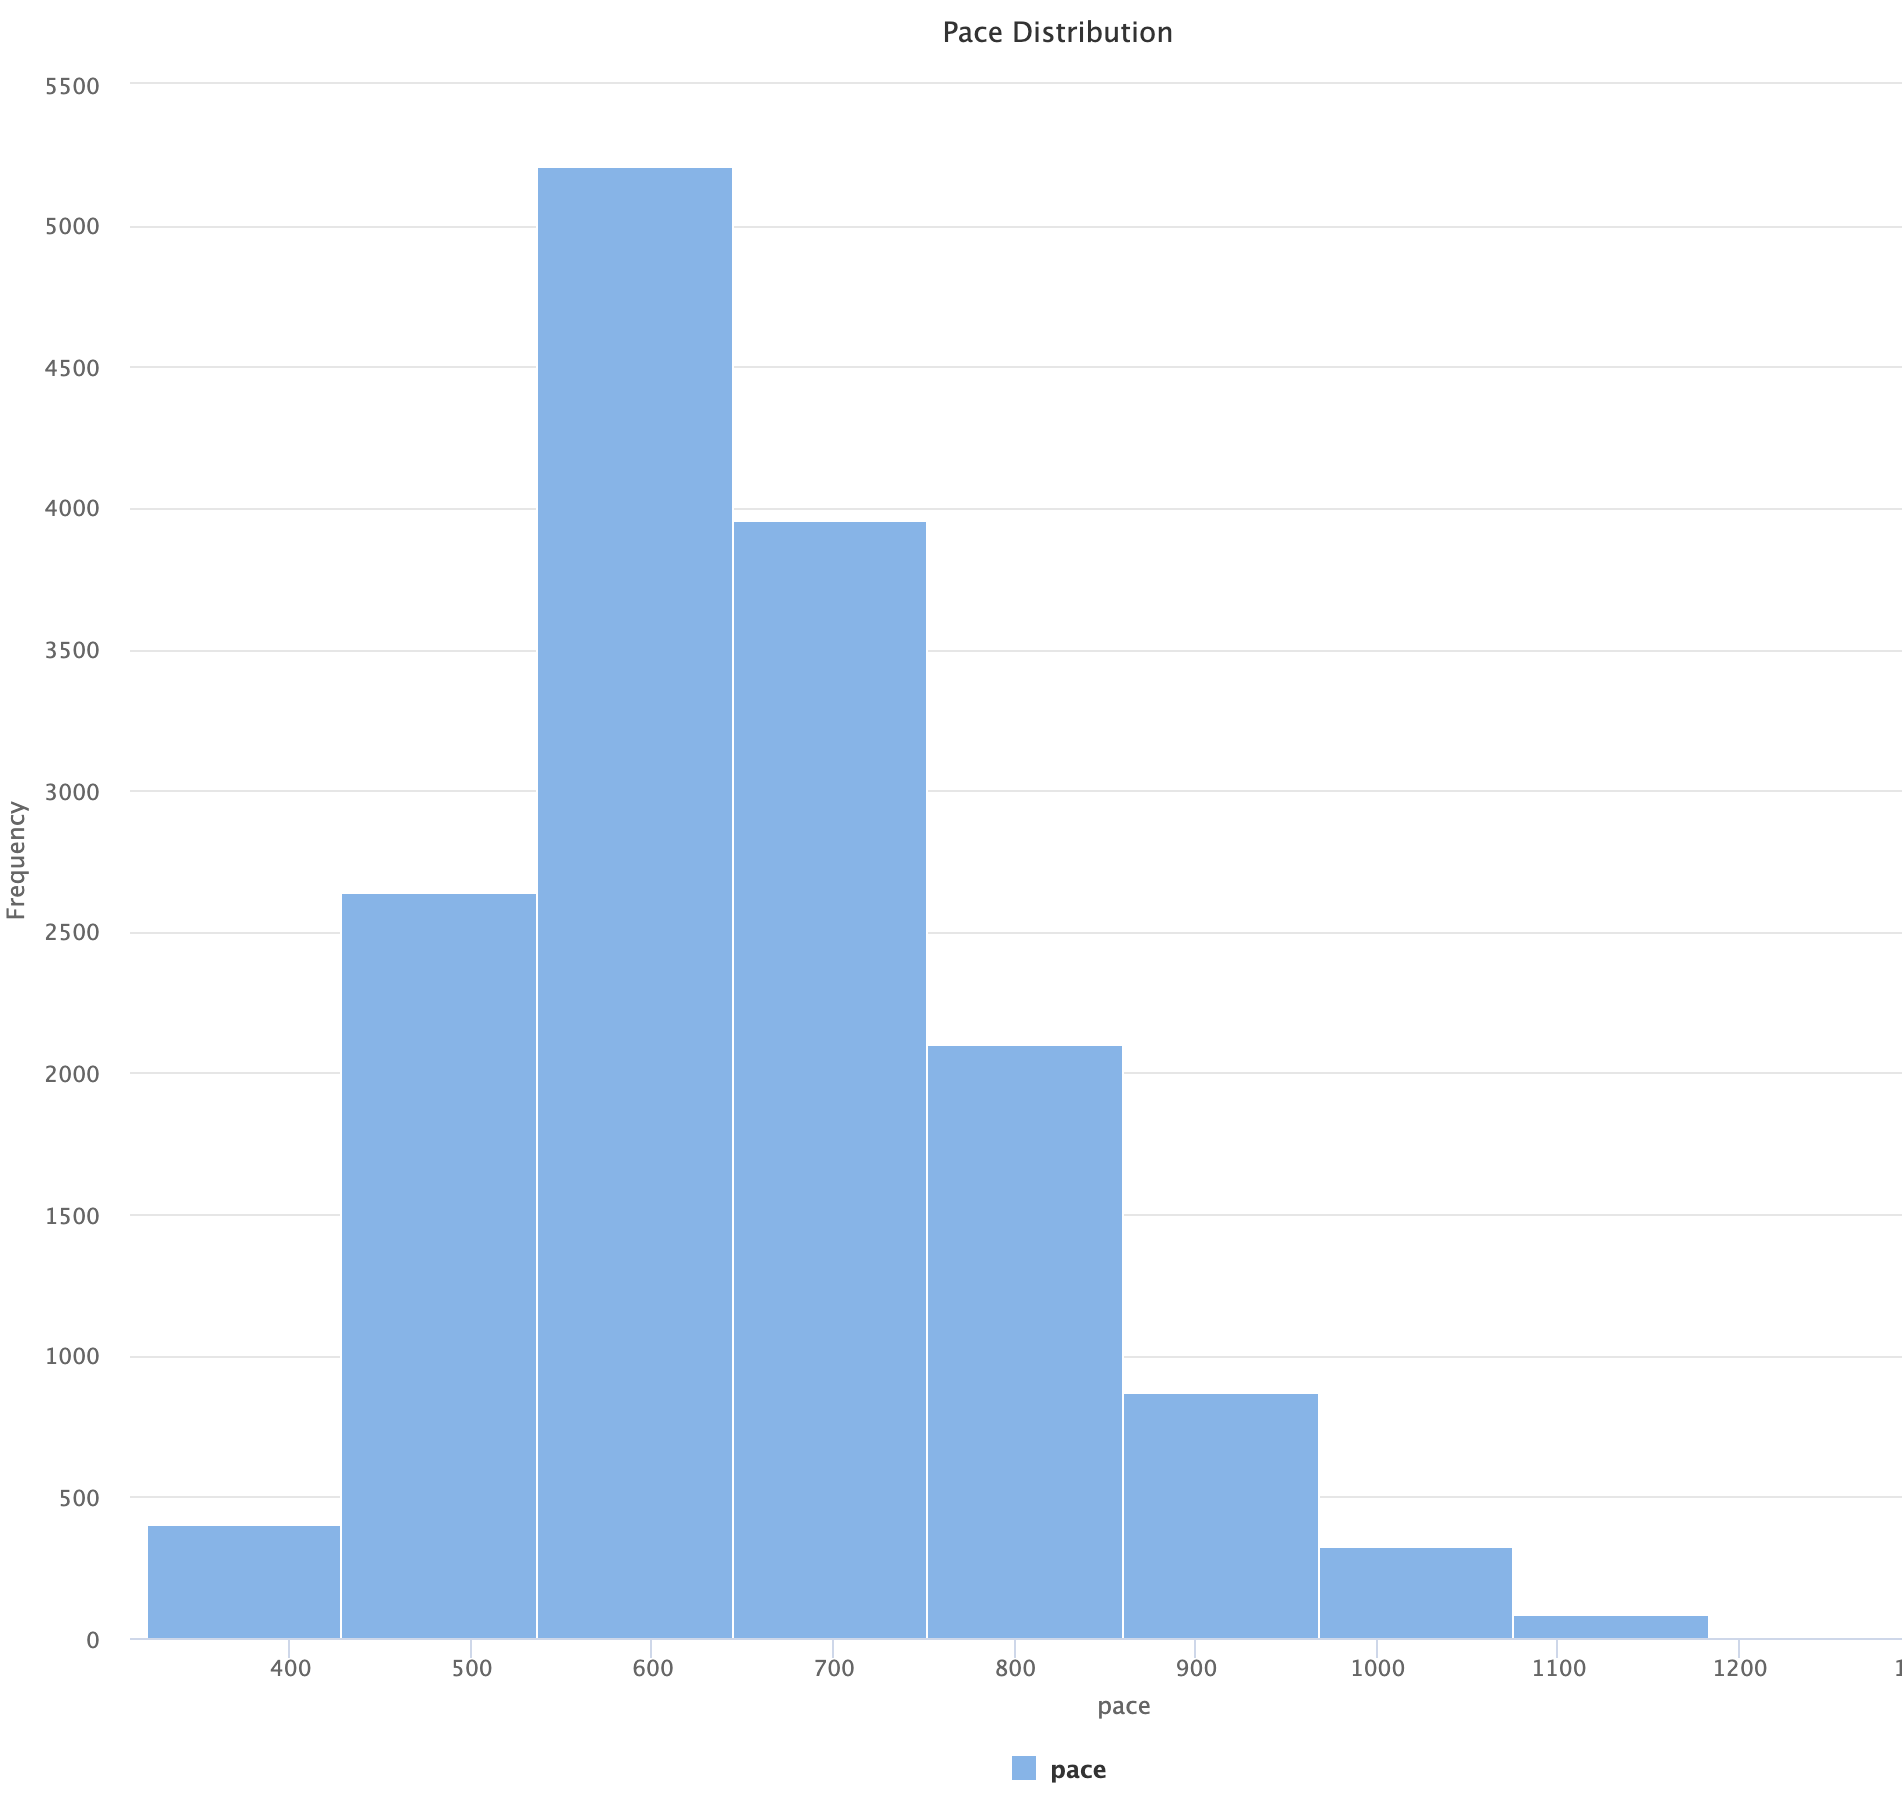


### Age/Pace correlation

* In general, as aging, pace slow down
* Number of runner descrease as age increase

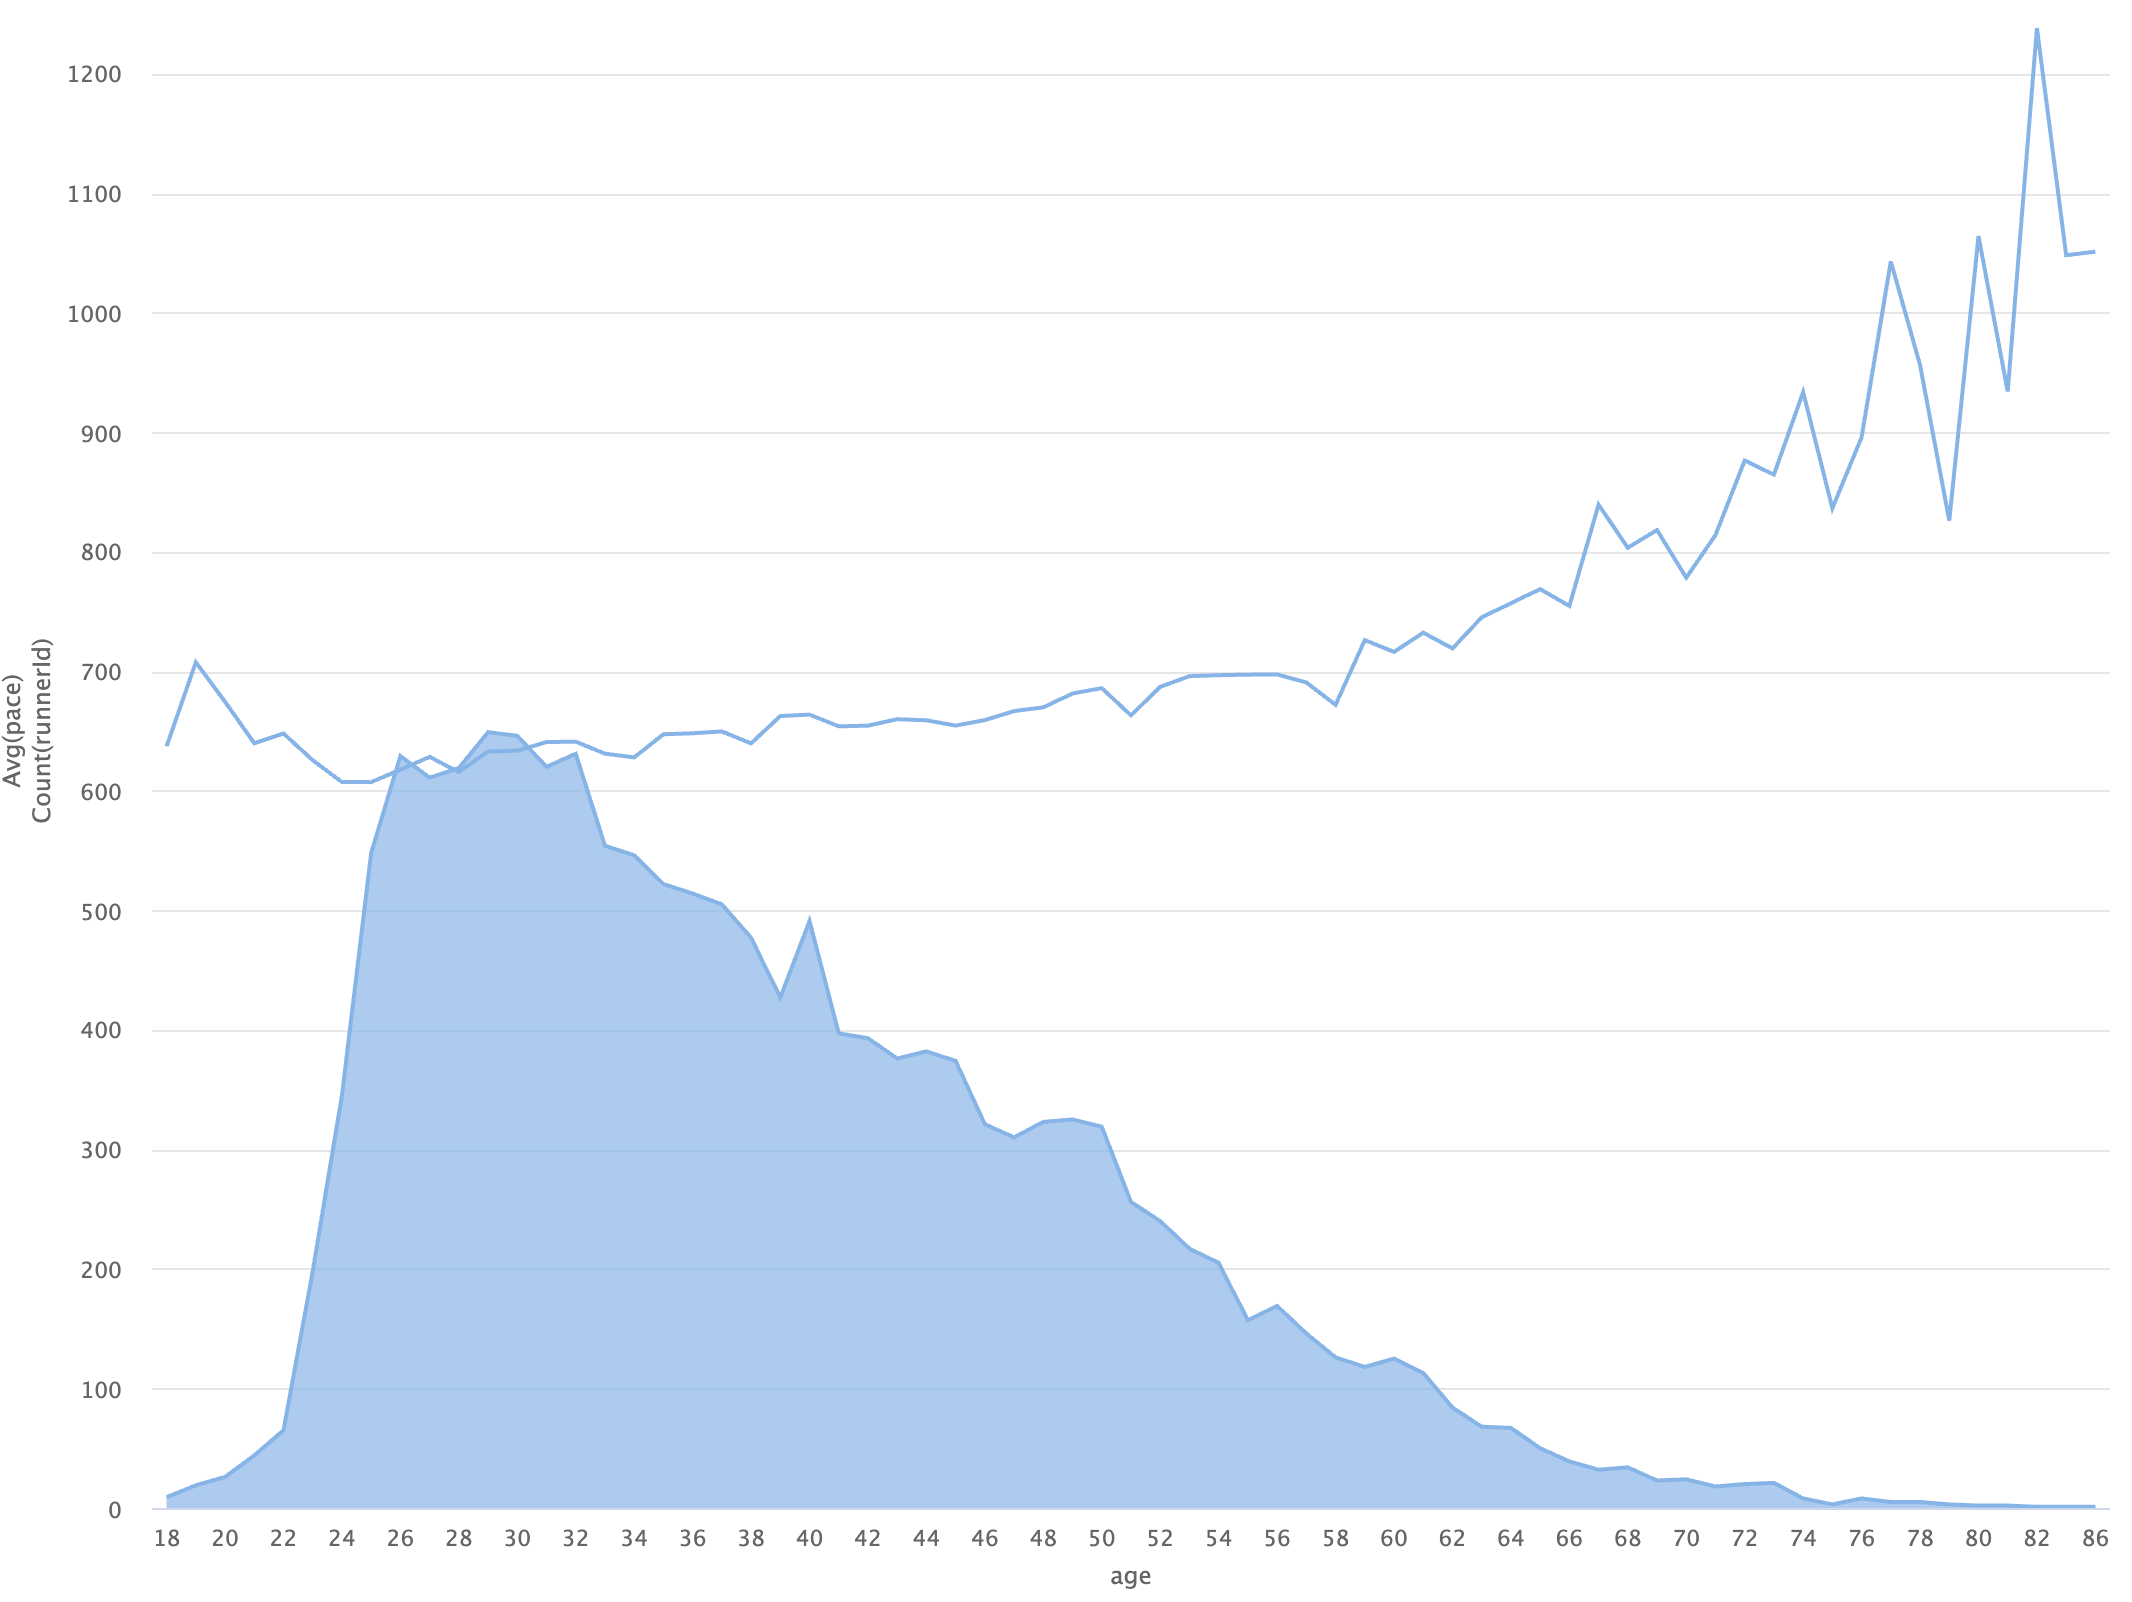



In [8]:
racer_df = pd.read_csv('../data/nyrr/race_racers.csv')
nj_df = racer_df.loc[racer_df['stateProvince'].isin(['NJ'])]
ny_df = racer_df.loc[racer_df['stateProvince'].isin(['NY'])]

racer_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/nyrr/race_racers.csv'

In [ ]:
ny_df[['city', 'countryCode', 'stateProvince','racesCount']].groupby(['city','stateProvince','countryCode'])['racesCount'].count().sort_values(ascending=False).head(12)

In [ ]:
nj_df[['city', 'countryCode', 'stateProvince','racesCount']].groupby(['city','stateProvince','countryCode'])['racesCount'].count().sort_values(ascending=False).head(12)

In [ ]:
racer_df = pd.read_csv('../data/nyrr/racer_info.csv')
racer_df.head()

In [ ]:
racer_performance_df = pd.read_csv('../data/nyrr/racer_races.csv')
racer_performance_df.head()

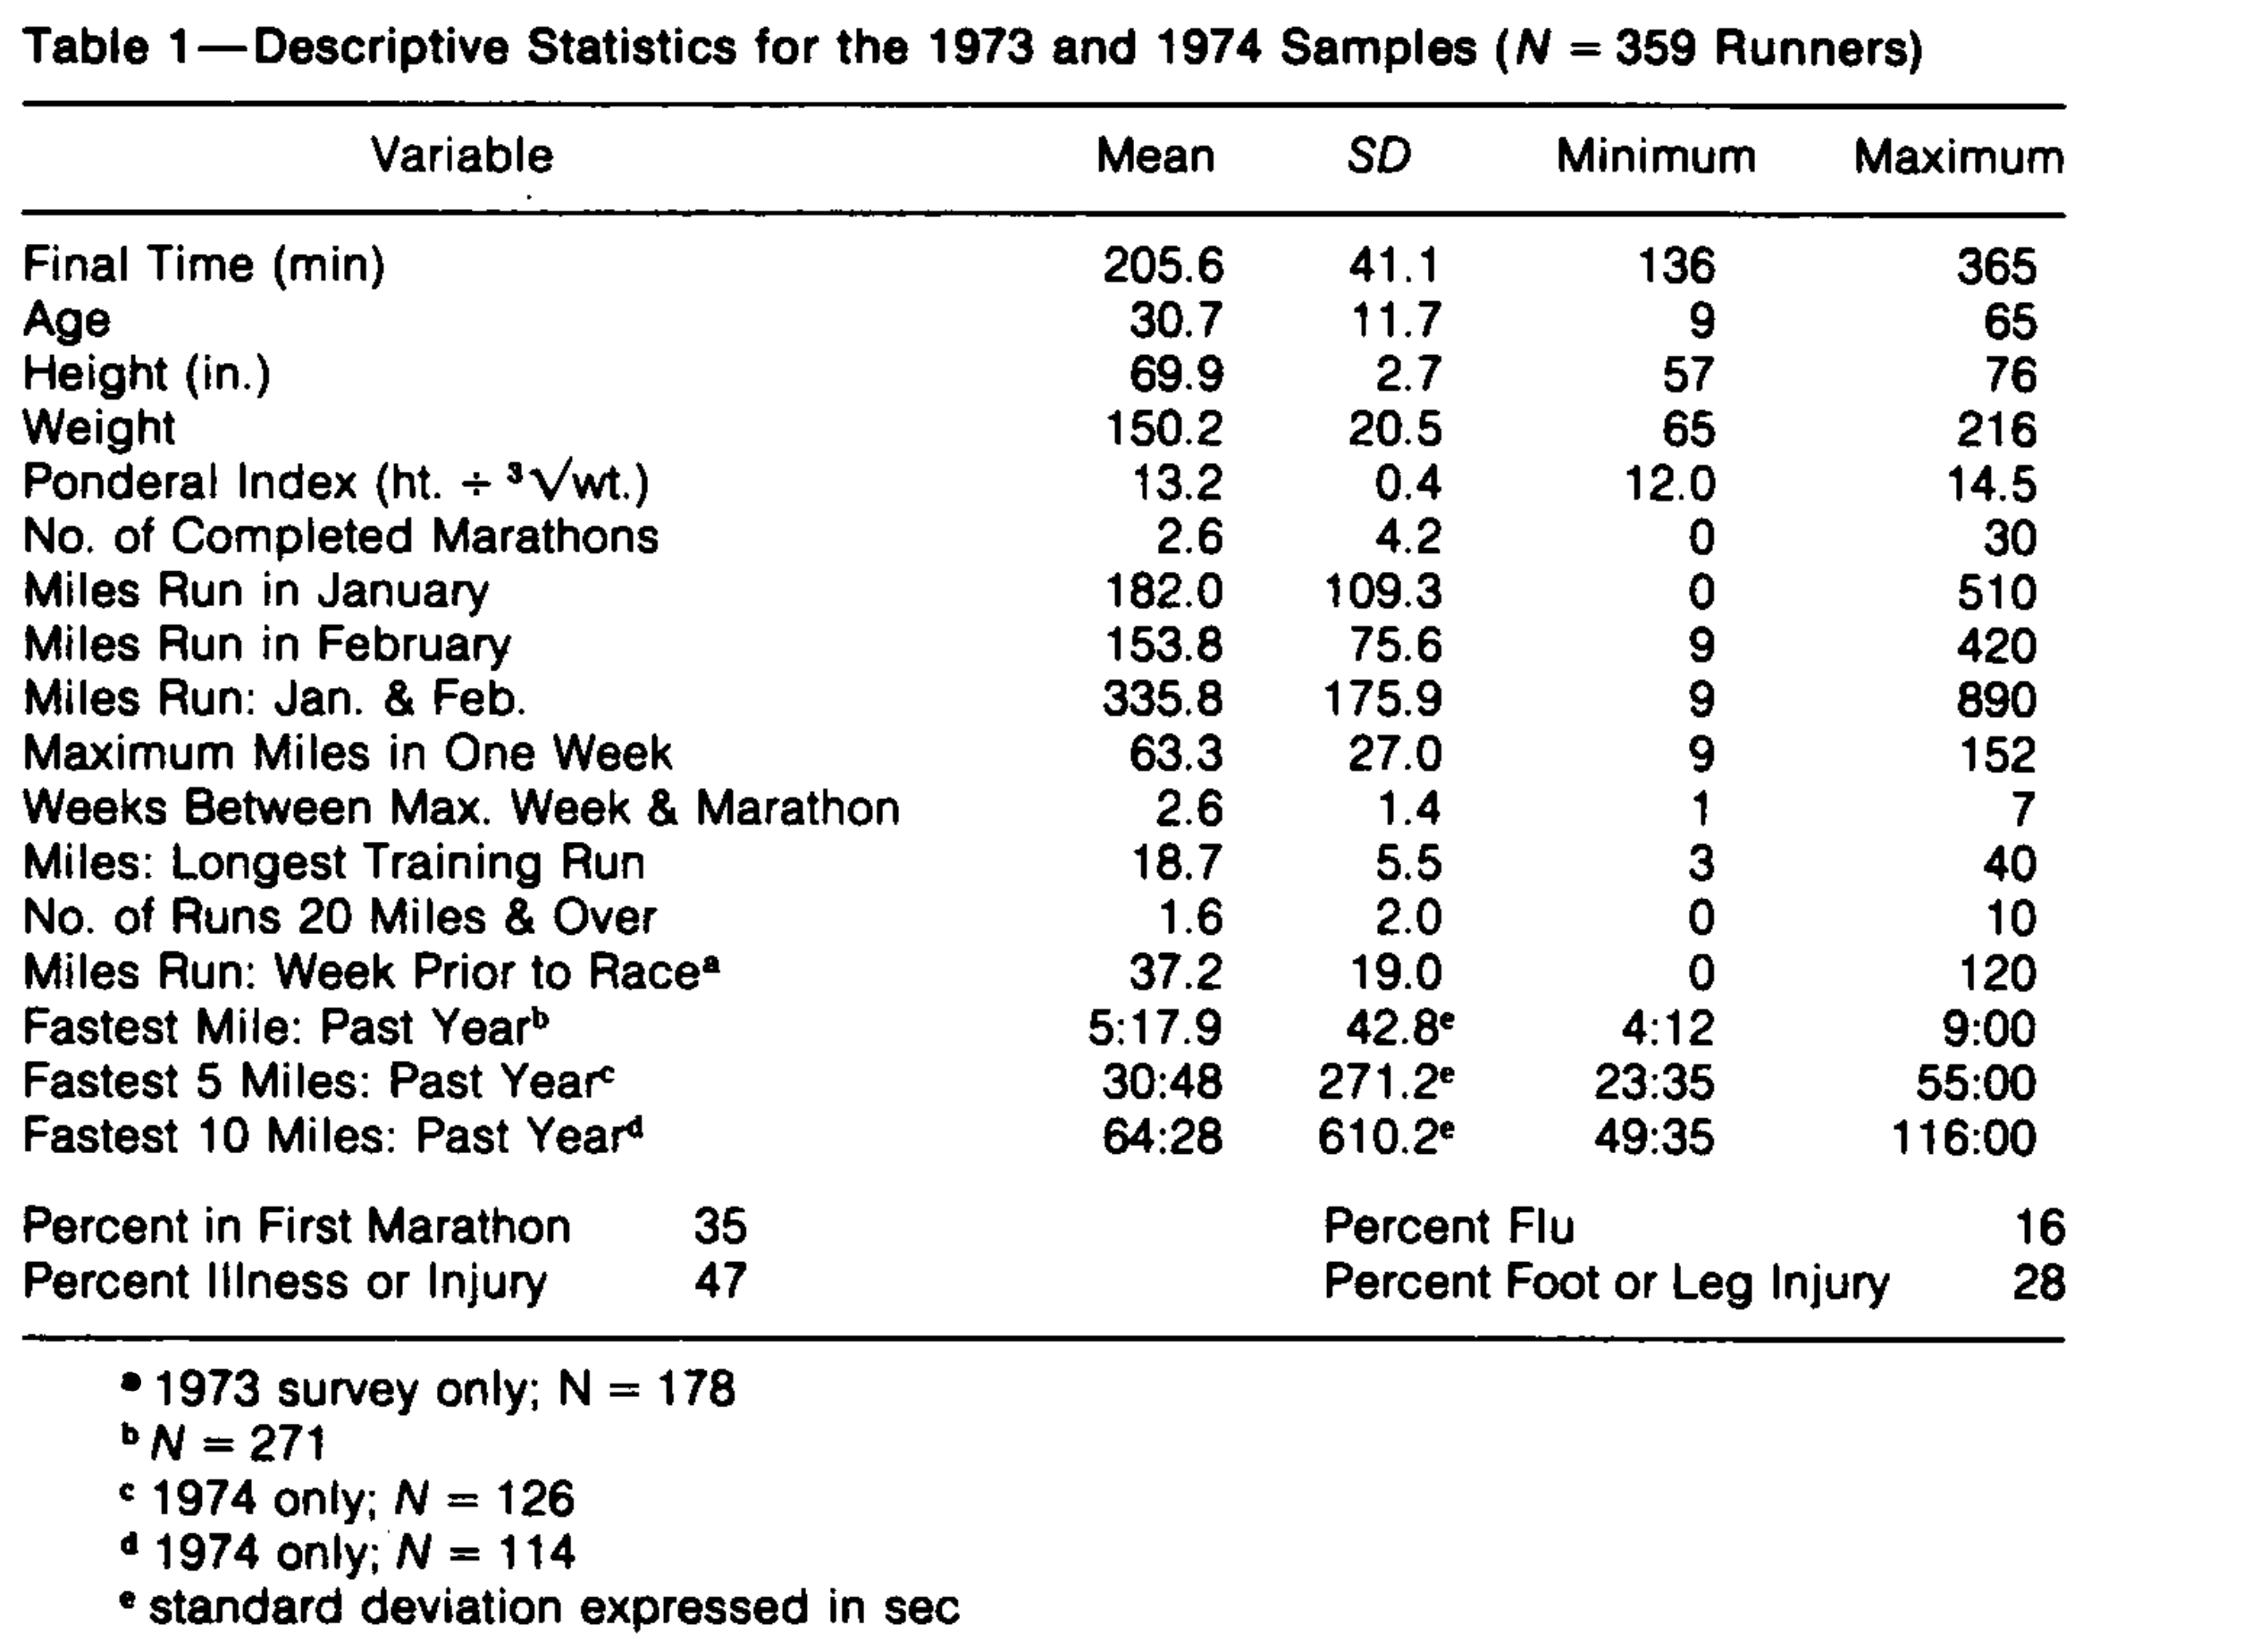

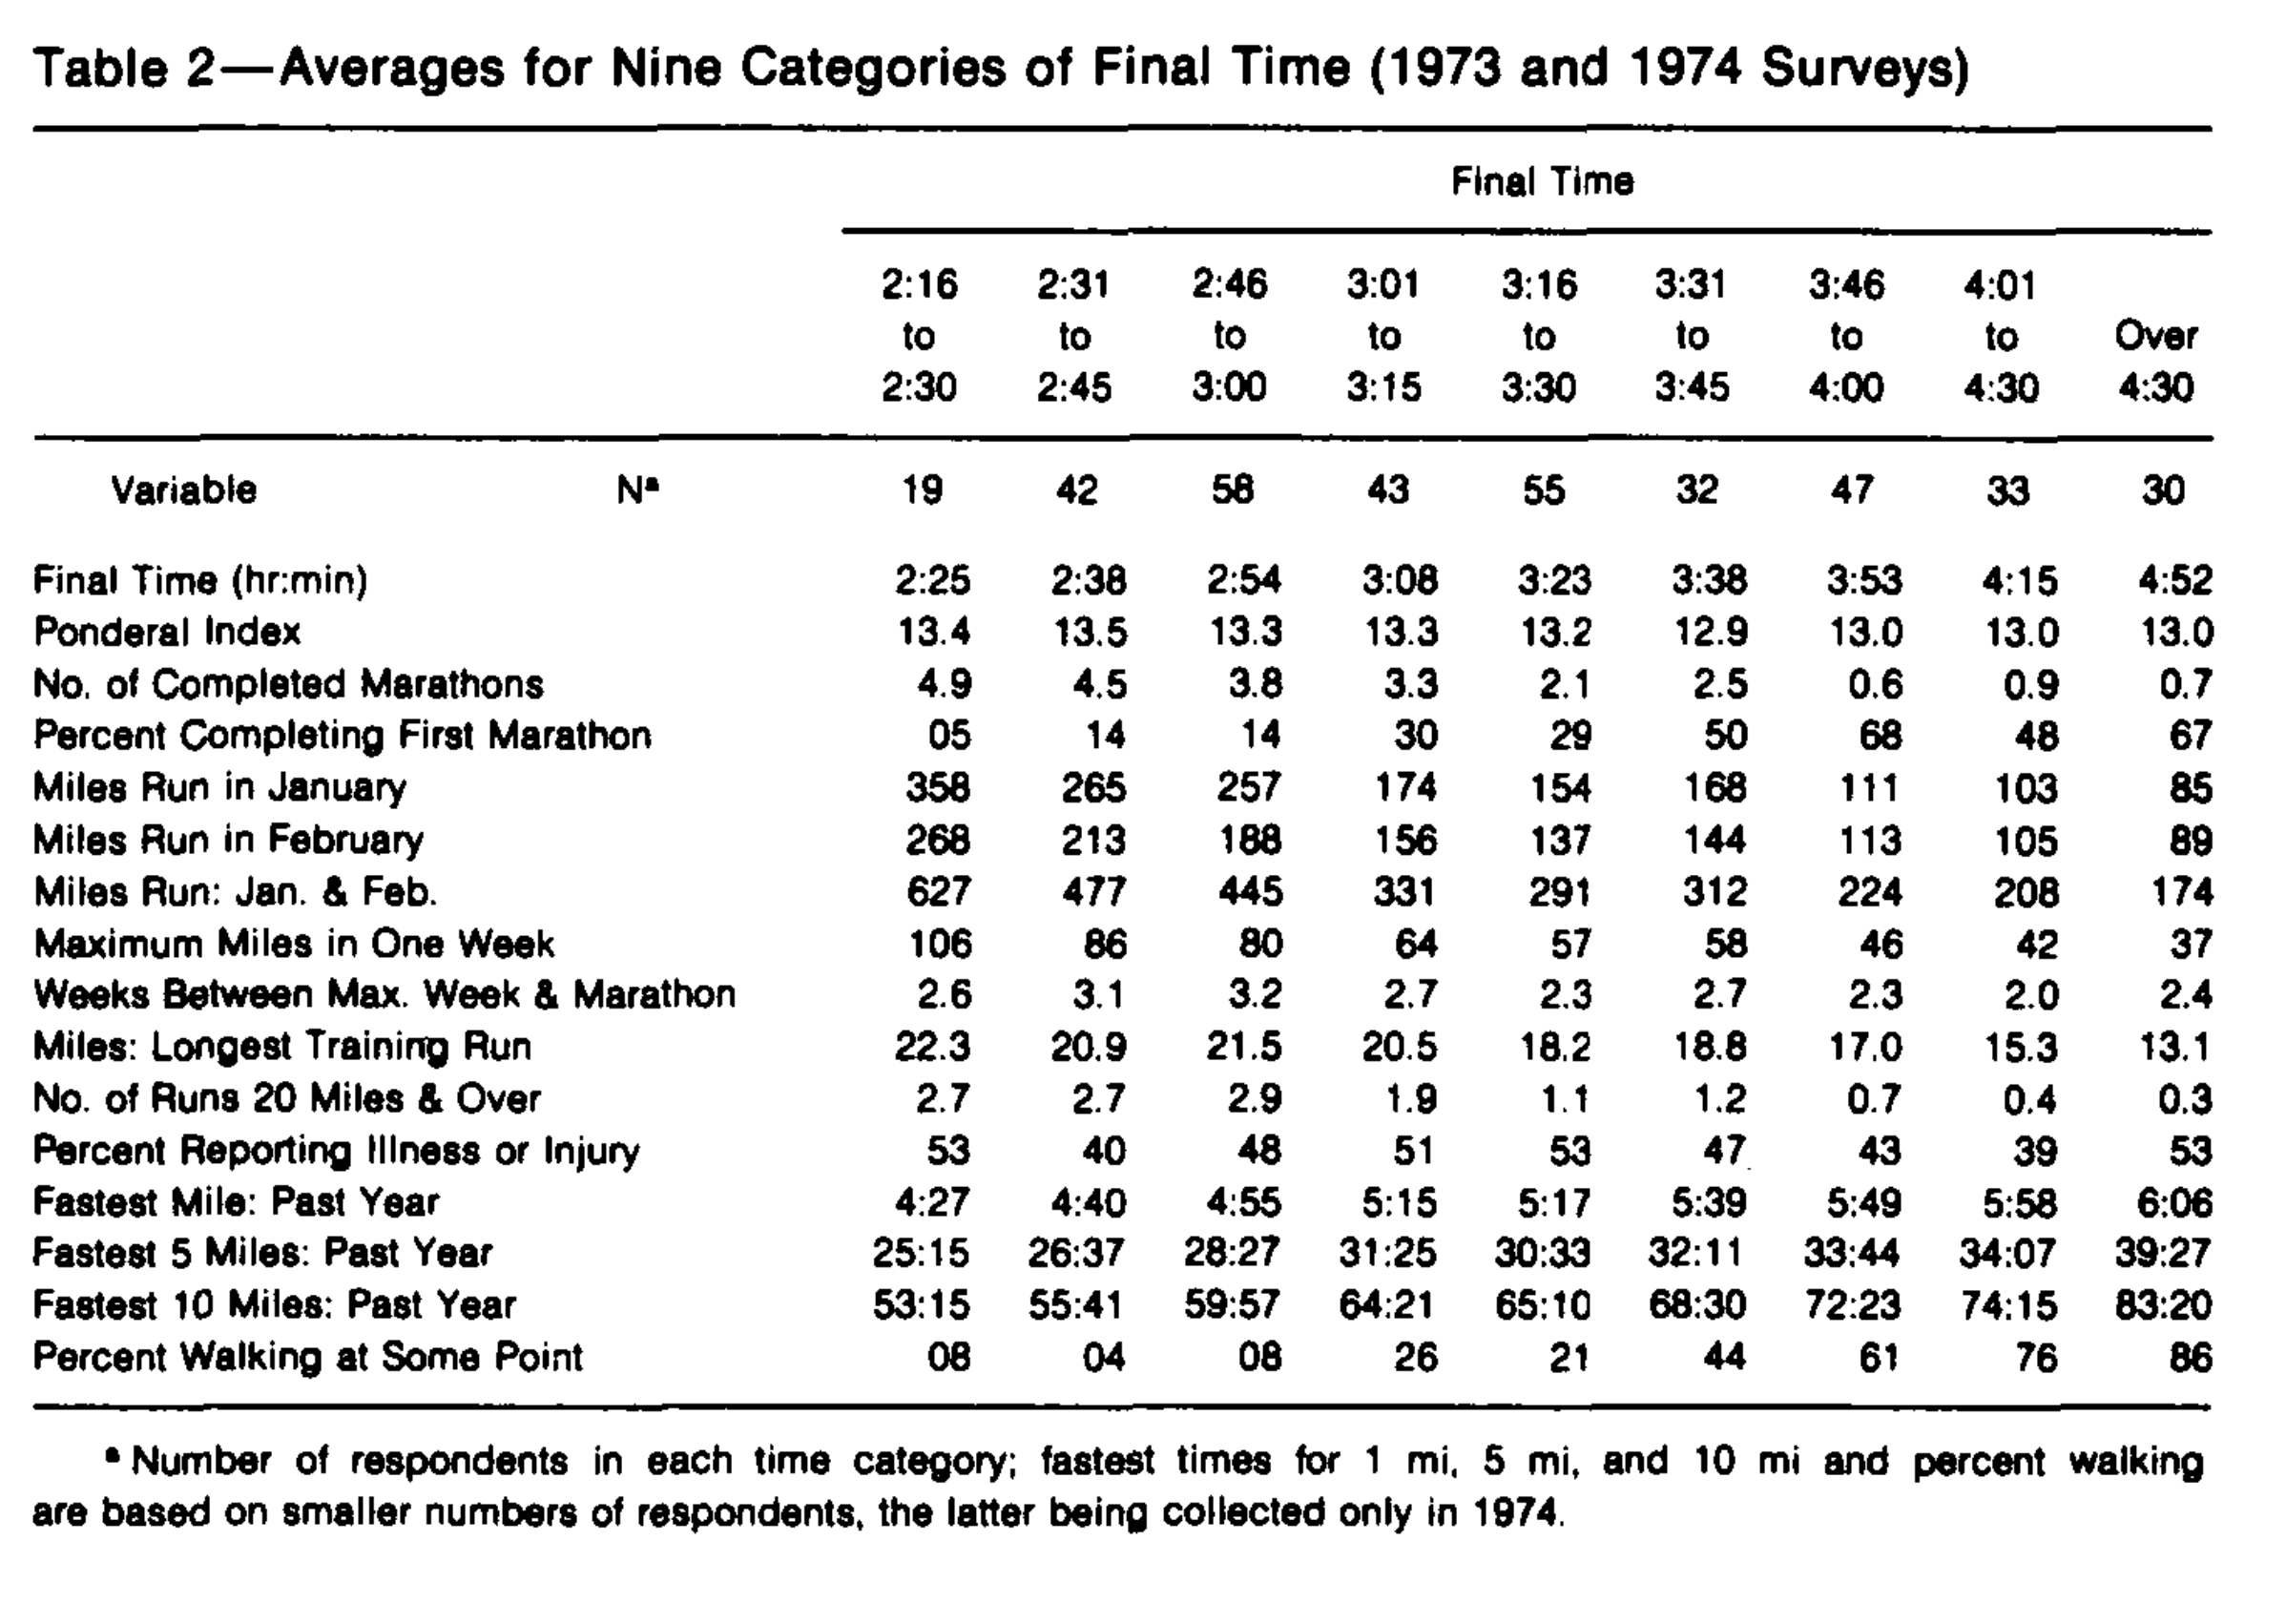
Sample from [3]

## NYRR Event Statistic

In [ ]:
events_df = pd.read_csv('../data/nyrr/events.csv')

events_df.head()


In [ ]:
events_df.sort_values(by='startDateTime')['eventCode'].to_list()